In [441]:
from functions import *
from read_from_file_df import *
import pickle

In [442]:
def to_show(board,size):
    table = np.zeros((size, size, 3))
    for index, col in enumerate(board.columns):
        color = int(board[col]) * -1 + 1
        i = index // size
        j = index % size
        table[i, j] = [color, color, color]
    return table

In [443]:
READ_FILE = 2502
FILE_TO_READ = f"{SIZE}-{READ_FILE}-{AMOUNT_MOVES}boards.bnr"
PATH_TO_READ = str(READ_FILE % NUM_DICT) + "\\" + FILE_TO_READ
df = read_file_to_df(PATH_TO_READ, SIZE)

In [444]:
num_board = 5
board1 = df.iloc[num_board-1:num_board]
board2 = df.iloc[num_board:num_board+1]
board3 = df.iloc[num_board+1:num_board+2]

In [445]:
board1

,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(0,5)","(0,6)","(0,7)","(0,8)","(0,9)",...,"(9,0)","(9,1)","(9,2)","(9,3)","(9,4)","(9,5)","(9,6)","(9,7)","(9,8)","(9,9)"
4,1,0,0,0,0,0,0,1,0,1,...,0,1,0,1,1,0,1,1,0,1


C:\Users\dror\AppData\Local\Temp\ipykernel_22744\570581587.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


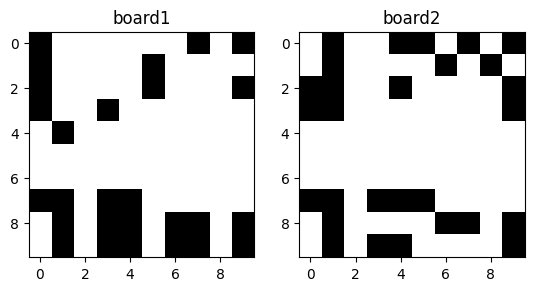

In [446]:
board1_to_show = to_show(board1,SIZE)
board2_to_show = to_show(board2,SIZE)
fig, axes = plt.subplots(1, 2)

# Plot the first image
axes[0].imshow(board1_to_show)
axes[0].set_title('board1')

# Plot the second image
axes[1].imshow(board2_to_show)
axes[1].set_title('board2')

# Show the images
plt.show()

In [447]:
new_columns = [f'Col_{i}' for i in range(1, LEN + 1)]
board1.columns = new_columns
source = PATH_MODELS + "forward\\dt"
res = pd.DataFrame()
for i in range(LEN): # to any pixel in the expected board
    name_file = f"{source}_pixel_{str(i+1)}.pkl"
    with open(name_file, 'rb') as file:
        loaded_model = pickle.load(file)
    pixel = loaded_model.predict(board1)
    res[i] = pixel

C:\Users\dror\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\dror\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:

C:\Users\dror\AppData\Local\Temp\ipykernel_22744\570581587.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


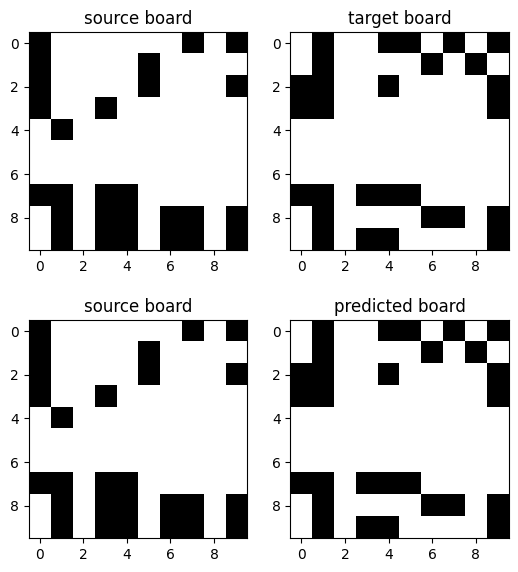

In [448]:
res_to_show = to_show(res,SIZE)
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(board1_to_show)
axes[0, 0].set_title('source board')
axes[0, 1].imshow(board2_to_show)
axes[0, 1].set_title('target board')
axes[1, 0].imshow(board1_to_show)
axes[1, 0].set_title('source board')
axes[1, 1].imshow(res_to_show)
axes[1, 1].set_title('predicted board')

plt.subplots_adjust(top=1.2, bottom=0.1, left=0.15, right=0.9)

# Show the images
plt.show()

In [449]:
new_columns = [f'Col_{i}' for i in range(1, LEN + 1)]
board2.columns = new_columns
source = PATH_MODELS + "reverse1\\dt_r1"
res = pd.DataFrame()
for i in range(LEN): # to any pixel in the expected board
    name_file = f"{source}_pixel_{str(i+1)}.pkl"
    with open(name_file, 'rb') as file:
        loaded_model = pickle.load(file)
    pixel = loaded_model.predict(board2)
    res[i] = pixel

C:\Users\dror\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\dror\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:

C:\Users\dror\AppData\Local\Temp\ipykernel_22744\570581587.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


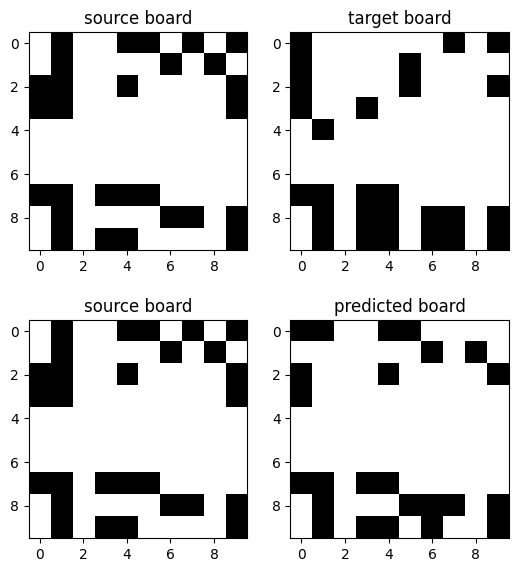

In [450]:
res_to_show = to_show(res,SIZE)
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(board2_to_show)
axes[0, 0].set_title('source board')
axes[0, 1].imshow(board1_to_show)
axes[0, 1].set_title('target board')
axes[1, 0].imshow(board2_to_show)
axes[1, 0].set_title('source board')
axes[1, 1].imshow(res_to_show)
axes[1, 1].set_title('predicted board')

plt.subplots_adjust(top=1.2, bottom=0.1, left=0.15, right=0.9)

# Show the images
plt.show()

In [451]:

s = 0
for i in range(LEN):
    if res.iloc[0][i] == board1.iloc[0][i]:
        s+=1
print(s)

83


C:\Users\dror\AppData\Local\Temp\ipykernel_22744\3285619179.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if res.iloc[0][i] == board1.iloc[0][i]:


In [452]:
def find_loc(pixel, size):
    pixel = pixel-1
    x = pixel // size
    y = pixel % size
    return (x,y)

def calc_neighs(field, i, j,size, radii = 1):
    """ Calculate number of neighbors alive (assuming square field) """
    neighs = 0
    M = generate_twice_tuples(radii)
    for m in M:
        row_idx = m[0] + i
        col_idx = m[1] + j
        if row_idx<0: row_idx+=size
        if col_idx<0: col_idx+=size
        if row_idx>=size: row_idx-=size
        if col_idx>=size: col_idx-=size
        if field[row_idx*size+col_idx]:
            neighs += 1
    return neighs

size = SIZE
radii = 2
new_columns = [f'Col_{i}' for i in range(1, LEN + 1)]
board1.columns = new_columns
board2.columns = new_columns

In [453]:
new_columns = [f'Col_{i}' for i in range(1, 2*SIZE*SIZE + 1)]
res_df = pd.DataFrame(columns=new_columns)

df = df[:].drop_duplicates().reset_index(drop=True)
new_row = df
new_col = df.iloc[1:].reset_index(drop=True)
df = df.iloc[1:].reset_index(drop=True)
new_row = pd.concat([new_col,new_row.iloc[:-1]],axis=1)
new_row.columns = new_columns
res_df = pd.concat([res_df,new_row])

In [454]:
board12 = res_df.iloc[5:6]

In [455]:
board12

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_191,Col_192,Col_193,Col_194,Col_195,Col_196,Col_197,Col_198,Col_199,Col_200
5,0,1,0,1,1,1,1,1,0,1,...,0,1,0,1,1,0,0,0,0,1


In [456]:
new_columns = [f'Col_{i}' for i in range(1, LEN*2 + 1)]

board12.columns = new_columns
source = PATH_MODELS + "reverse2\\dt_r2"
res = pd.DataFrame()
for i in range(LEN): # to any pixel in the expected board
    now_board= board12
    loc = find_loc(i+1, size)
    now_board['radius1'] = now_board.apply(lambda row: calc_neighs(row[:size*size],loc[0], loc[1],size,radii ), axis=1)
    now_board['radius2'] = now_board.apply(lambda row: calc_neighs(row[size*size:],loc[0], loc[1],size,radii ), axis=1)

    name_file = f"{source}_pixel_{str(i+1)}.pkl"
    with open(name_file, 'rb') as file:
        loaded_model = pickle.load(file)
    pixel = loaded_model.predict(now_board)
    res[i] = pixel

C:\Users\dror\AppData\Local\Temp\ipykernel_22744\2861443901.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\dror\AppData\Local\Temp\ipykernel_22744\1983160930.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  now_board['radius1'] = now_board.apply(lambda row: calc_neighs(row[:size*size],loc[0], loc[1],size,radii ), axis=1)
C:\Users\dror\AppData\Local\Temp\ipykernel_22744\2861443901.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tre

C:\Users\dror\AppData\Local\Temp\ipykernel_22744\570581587.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


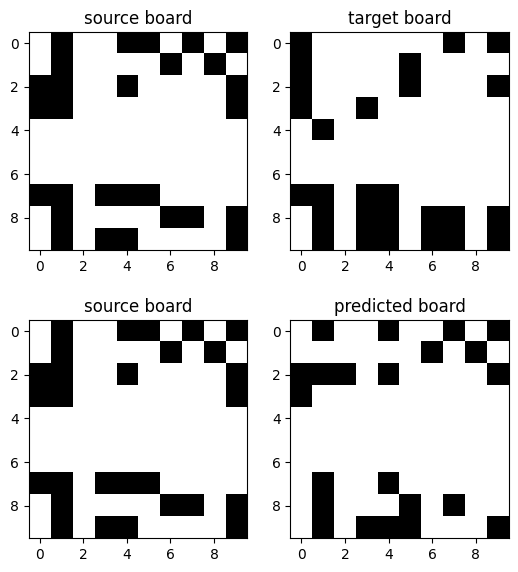

In [457]:
res_to_show = to_show(res,SIZE)
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(board2_to_show)
axes[0, 0].set_title('source board')
axes[0, 1].imshow(board1_to_show)
axes[0, 1].set_title('target board')
axes[1, 0].imshow(board2_to_show)
axes[1, 0].set_title('source board')
axes[1, 1].imshow(res_to_show)
axes[1, 1].set_title('predicted board')
plt.subplots_adjust(top=1.2, bottom=0.1, left=0.15, right=0.9)

# Show the images
plt.show()

In [458]:

s = 0
for i in range(LEN):
    if res.iloc[0][i] == board1.iloc[0][i]:
        s+=1
print(s)

C:\Users\dror\AppData\Local\Temp\ipykernel_22744\3285619179.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if res.iloc[0][i] == board1.iloc[0][i]:


77
